# **IMAGE CLASSIFICATION - WHITE BOOLD CELL🩸**

*Ramdhina Finita - 02/02/2023*

## **Latar Belakang dan Persiapan Data**


Sel darah putih memainkan peran penting dalam bidang diagnosis penyakit terkait darah utama. Tubuh kita terutama mengandung tiga jenis sel darah, yang meliputi sel darah merah, sel darah putih (WBC), dan trombosit. Sel darah putih juga disebut sel imun karena mereka adalah sel dari sistem kekebalan tubuh. Identifikasi penyakit yang berhubungan dengan darah terutama didasarkan pada ciri-ciri atau sifat-sifat inti sel darah putih. Jadi klasifikasi sel darah putih yang andal menjadi penting dan semakin dituntut. Data yang tidak mencukupi merupakan salah satu keterbatasan dalam metode yang sudah ada. Serta elemen latar belakang yang tidak diinginkan dalam kumpulan data dapat mengurangi kinerja dari klasifikasi. Sehingga untuk mengklasifikasikan citra sel darah, metode yang disempurnakan dengan menggunakan pendekatan jaringan saraf convolutional diusulkan. Database WBC digunakan untuk klasifikasi sel darah putih. 

Dengan menggunakan machine learning dengan penggunaan model CNN transfer learning dan juga menggunakan beberapa hypyerparameter tuning, diharapkan model klasifikasi sel darah dengan akurasi terbaik dapat digunakan sebagai prediksi klasifikasi secara cepat dan akurat.

**Hemopatologi** (hemo artinya darah, patologi artinya penyakit), adalah ilmu yang mempelajari penyakit melalui sel darah. Struktur sel darah yang tidak normal, tingkat jumlah sel darah, dan lain sebagainya merupakan beberapa faktor yang dapat digunakan untuk mengidentifikasi beberapa penyakit.

Beberapa penyakit, seperti leukemia, demam berdarah, thalassemia dan malaria, telah menandai perubahan jumlah sel darah putih. Hal ini dikarenakan beberapa jenis sel darah putih hanya dapat melawan jenis penyakit tertentu. Perubahan jumlah sel ini dapat digunakan untuk mengidentifikasi penyakit. Dengan begitu, penggunaan CNN dalam mengidentifikasi sel darah putih dapat bermanfaat sehingga proses identifikasi perubahan jumlah sel darah dapat dilakukan dengan cepat dan akurat menggunakan deep learning.

**Contoh Tampilan klasifikasi Sel Darah Putih**\
Dari: [WBC image classification and generative models based on convolutional neural network](http://https://bmcmedimaging.biomedcentral.com/articles/10.1186/s12880-022-00818-1)
![](https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs12880-022-00818-1/MediaObjects/12880_2022_818_Fig1_HTML.png?as=webp)

## **Tentang Data**

### [Blood Cell](https://github.com/Shenggan/BCCD_Dataset) 🩸

Kumpulan data ini berisi 12.500 gambar sel darah yang diperbesar (JPEG) dengan label tipe sel (CSV) yang menyertainya. Ada sekitar 3.000 gambar untuk masing-masing dari 4 jenis sel berbeda yang dikelompokkan ke dalam 4 folder berbeda (menurut jenis sel). Jenis sel adalah **`Eosinofil`, `Limfosit`,` Monosit`, dan `Neutrofil`.** Kumpulan data ini disertai dengan kumpulan data tambahan yang berisi 410 gambar asli (pra-augmentasi) serta dua label subtipe tambahan (WBC vs WBC) dan juga kotak pembatas untuk setiap sel di masing-masing 410 gambar ini (metadata JPEG + XML). Lebih khusus lagi, folder 'dataset-master' berisi 410 gambar sel darah dengan label subtipe dan kotak pembatas (JPEG + XML), sedangkan folder 'dataset2-master' berisi 2.500 gambar augmented serta 4 label subtipe tambahan (JPEG + CSV). Ada sekitar 3.000 gambar tambahan untuk setiap kelas dari 4 kelas dibandingkan dengan 88, 33, 21, dan 207 gambar masing-masing di folder 'dataset-master'.

Data yang digunakan saat ini menggunakan folder 'dataset2-master' yang mana sudah terbagi menjadi data TRAIN dan TEST dimana didalam tiap folder TRAIN dan TEST terdapat folder sesuai dengan kelas sel darah putihnya.

## **Data Preprocessing & Exploratory Data Analysis**
### **Import Library/Packages**

In [3]:
import os

# Neural Network Model
import tensorflow as tf
import keras 
import keras.applications as A
import keras.backend as B
from keras import regularizers
from keras.models import Sequential,Model
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *

from tensorflow.keras.layers import BatchNormalization, Lambda
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, RMSprop , SGD
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers , Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Model Tuner
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, GlobalMaxPool2D
from tensorflow.keras import Model
from keras_tuner.tuners import RandomSearch

# Visualisasi Confussion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
from shutil import copyfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import numpy as np

In [4]:
# Cek version Tensorflow 
print(tf.__version__)

2.6.4


Hal pertama yang harus kita lakukan adalah menguraikan data sebelum membangun model. Dalam masalah klasifikasi gambar, merupakan praktik umum untuk meletakkan setiap gambar pada folder terpisah berdasarkan kelas/label target. Misalnya, di folder kereta di data yang kita miliki, kita memiliki 2 folder utama yakni Train dan Test. Dimana kita perlu membaca datanya terlebih dahulu dan melakukan pembagian data train.

Dataset dibagi 80% untuk pelatihan/training dan 20% untuk validasi, karena kita perlu melatih dan mengevaluasi model sebelum digunakan untuk kasus nyata. Dataset latih akan digunakan untuk melatih model sedangkan dataset validasi digunakan untuk mengevaluasi model. Melakukan assign data Train dan Test. Untuk data Validation nanti didapatkan dari pembagian 80:20 dari dataset Train.



Pada prakteknya, kita perlu membagi data untuk 3 subset, yaitu Data training, validation dan test.

Pembagian subset ini harus dilakukan dari awal. Komposisi pembagian bisa berbeda-beda, umumnya:

* 80% Training, 10% Validasi dan 10% Test
* Atau 70% Training, 20% Validasi dan 10% Test.
Antar subset data tidak boleh overlap, karena akan merusak proses training model. Selalu pastikan ukuran training harus jauh lebih besar dari data validasi dan test. Karena dengan data training yang terlalu kecil, model tidak akan “belajar”.

**da tahap ini saya mencoba untuk membagi menjadi 80% Training, 20% validasi dari path TRAIN, dan TEST tidak dibagi lagi karena sudah ada path nya sendiri.**

**Data Training,** seperti namanya, data yang digunakan untuk training model. Sejauh ini kita telah melakukan tersebut.

**Data Validation,** digunakan untuk proses validasi model dan mencegah overfitting.

Dataset di input ke sistem untuk menghitung loss function, tanpa melakukan update bias dan weight.

Setiap epoch atau iterasi, proses training dan validasi dilakukan beruntutan. Setiap selesai melakukan training, dilanjutkan dengan proses validasi.

JIka nilai loss function dari proses validasi naik, training model dihentikan. Akan kita bahas lebih detail di lesson berikutnya.

**Data Testing,** digunakan untuk testing model, sebagai simulasi penggunaan model pada dunia nyata. Data testing tidak boleh pernah dilihat oleh model sebelumnya.

![](https://miro.medium.com/max/720/1*Nv2NNALuokZEcV6hYEHdGA.webp)

In [48]:
# Define the directories for the train, and test sets from folder input
train_path = '../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN'
test_path = '../input/blood-cells/dataset2-master/dataset2-master/images/TEST'

### Cek Dimensi Gambar

In [49]:
from PIL import Image
train_path1 = '../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL'
test_path1 = '../input/blood-cells/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL'
for file_name in os.listdir(train_path1):
    file_path = os.path.join(train_path1, file_name)
    if os.path.isfile(file_path):
        img = Image.open(file_path)
        width, height = img.size
#         print("width:", width)
#         print("Height:", height)
for file_name in os.listdir(test_path1):
    file_path = os.path.join(test_path1, file_name)
    if os.path.isfile(file_path):
        img = Image.open(file_path)
        width, height = img.size
#         print("width:", width)
#         print("Height:", height)
#Output (width: 320, Height: 240)

width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320
Height: 240
width: 320


Berdasarkan hasil pengencekan dimensi gambar, semua gambar pada salah satu contoh label darah putih memiliki lebar 320 piksel dan tinggi 240 piksel. Sehingga perlu dilakukan proses rescale dengan ukuran yang sesuai dengan model yang digunakan.

# **VGG19**

### **Data Augmentation**

Augmentasi gambar merupakan teknik yang dapat digunakan untuk meningkatkan keragaman dataset train dan membantu mencegah terjadinya overfitting. Meskipun tidak selalu diperlukan untuk melakukan augmentasi gambar, hal ini dapat bermanfaat untuk meningkatkan performa model dalam situasi tertentu.

Jika kumpulan data besar dan beragam, augmentasi gambar mungkin tidak diperlukan. Namun, jika kumpulan datanya kecil atau tidak cukup beragam, augmentasi gambar dapat digunakan untuk memperbesar ukuran kumpulan data secara artifisial dan mengekspos model ke rentang variasi yang lebih luas.

Selain itu, saat mengerjakan project klasifikasi gambar, jika kumpulan data yang kita miliki tidak seimbang, dimana beberapa kelas kurang terwakili, augmentasi gambar dapat digunakan untuk membuat lebih banyak sampel untuk kelas yang kurang terwakili.

Penting untuk diperhatikan bahwa, Kita sebaiknya hanya menerapkan augmentasi data pada set data train, bukan pada set data test dan validasi. Karena kita pada dasarnya ingin model kita dapat digeneralisasikan ke data baru yang tidak terlihat, jadi sebaiknya kita tidak menggunakan teknik augmentasi data yang sama pada set validasi dan pengujian.

Melakukan pembagian data menjadi 3 dataset dengan membaca terlebih dahulu datanya menggunakan keras `ImageDataGenerator` dan melakukan splitting:

Ada beberapa cara untuk melakukan augmentasi gambar untuk dataset train, test, dan validasi. Berikut adalah beberapa teknik populer:

`Random rotation`: Memutar gambar dengan sudut acak dapat membantu model menggeneralisasi dengan lebih baik.

`Random flipping`: Membalik gambar secara horizontal atau vertikal juga dapat membantu model menggeneralisasi dengan lebih baik.

`Random cropping`: Memotong bagian gambar secara acak dapat membantu model belajar mengenali objek di lokasi berbeda.

`Random brightness and contrast`: Menyesuaikan kecerahan dan kontras gambar dapat membantu model menangani kondisi pencahayaan yang berbeda.

`Random zoom`: Memperbesar atau memperkecil gambar dapat membantu model belajar mengenali objek pada skala yang berbeda.

Ini dapat diterapkan menggunakan library seperti OpenCV, imgaug, dan Keras. Penting untuk diperhatikan bahwa, kita sebaiknya hanya menerapkan augmentasi data pada set data train, bukan pada set data test dan validasi. Karena kita ingin model kita dapat digeneralisasikan ke data baru yang tidak terlihat (test data/unseen data), jadi sebaiknya kita tidak menggunakan teknik augmentasi data yang sama pada set validasi dan test.

> * **rescale** adalah nilai dimana kita akan melipatgandakan data sebelum diproses lainnya. Gambar asli kami terdiri dari koefisien RGB pada 0-255, tetapi nilai tersebut akan terlalu tinggi untuk diproses oleh model kami (mengingat tingkat pembelajaran tipikal), jadi kami menargetkan nilai antara 0 dan 1 sebagai gantinya dengan menskalakan dengan 1/255. faktor.
> * **rotation_range** adalah nilai dalam derajat (0-180), rentang untuk memutar gambar secara acak
>
> * **width_shift** dan **height_shift** adalah rentang (sebagai bagian dari total lebar atau tinggi) untuk menerjemahkan gambar secara acak secara vertikal atau horizontal
>
> * **shear_range** adalah untuk menerapkan transformasi geser secara acak
> * **zoom_range** adalah untuk memperbesar gambar secara acak
> * **horizontal_flip** adalah untuk membalikkan separuh gambar secara acak secara horizontal --relevan bila tidak ada asumsi asimetri horizontal (mis. gambar dunia nyata).
> * **fill_mode** adalah strategi yang digunakan untuk mengisi piksel yang baru dibuat, yang dapat muncul setelah rotasi atau pergeseran lebar/tinggi.

In [50]:
# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)

# validation_datagen = ImageDataGenerator(rescale=1./255 )

test_datagen = ImageDataGenerator(rescale=1./255 )
 
# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32
test_batchsize = 32

Metode flow_from_directory berguna untuk menghasilkan kumpulan data gambar dari direktori/path. Metode ini membutuhkan beberapa paramater, antara lain

`IMAGE_DIR`: Direktori tempat data gambar disimpan.\
`IMAGE_SIZE`: Dimensi gambar (224 px kali 224 px). -> masukan gambar\
`BATCH_SIZE`: Jumlah gambar yang akan dimuat dan dilatih sekaligus.\
`SEED_NUMBER`: Memastikan reproduktifitas.\
`color_mode` = "rgb": Perlakukan gambar kita dengan 3 warna saluran.\
`class_mode` dan `classes` menentukan kelas target dari masalah kita. Dalam hal ini, kami menyatakan kelas cacat sebagai kelas positif (1), dan ok sebagai kelas negatif.\
`shuffle` = True untuk memastikan model mempelajari cacat dan memperbaiki gambar secara bergantian.

In [51]:
# Use the flow_from_directory method to generate batches of image data
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),#224
        batch_size=train_batchsize,
        class_mode='categorical', 
        seed=42,
        subset = "training")
 
validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,
        seed=42,
        subset='validation') #this way the images of the validation set are not augmented

test_generator = test_datagen.flow_from_directory(
        test_path,
        shuffle=False, #which means that the images are not augmented
        batch_size=test_batchsize,
        class_mode='categorical',
        seed=42,
        target_size=(224, 224))

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [52]:
# Cek dimensi gambar
x_batch, y_batch = train_generator.next()
print(x_batch.shape)

x_batch, y_batch = test_generator.next()
print(x_batch.shape)


(32, 224, 224, 3)
(32, 224, 224, 3)


Pada dasarnya kita tidak diperbolehkan untuk melakukan augmentasi pada data test maupun validasi karena akan menyebabkan overfitting dan dapat memberikan estimasi kinerja model yang terlalu optimis. Namun, kode yang diatas tidak menambah validasi dan test untuk dilakukan augmentasi dehingga langkah diatas merupakan praktik yang baik.

In [53]:
# Cek kelas 
class_test_labels = test_generator.class_indices
class_train_labels = train_generator.class_indices
class_val_labels = validation_generator.class_indices
print(class_test_labels)
print(class_train_labels)
print(class_val_labels)

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}


### **Visualisasi Data Gambar**
Setelah berhasil memuat dan menerapkan augmentasi data saat itu juga sesuai dengan parameter yang ditentukan. Sekarang, di bagian ini, tahap memvisualisasikan gambar untuk memastikan gambar dimuat dengan benar.

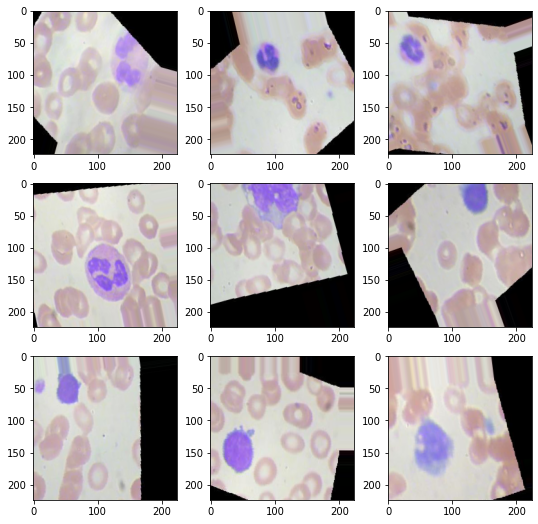

In [11]:
# Visualiasi data Train
plt.figure(figsize=(9,9))
for i in range(9):
    # 3x3 grid
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]
    image = batch[0]
    plt.imshow(image)
plt.show();

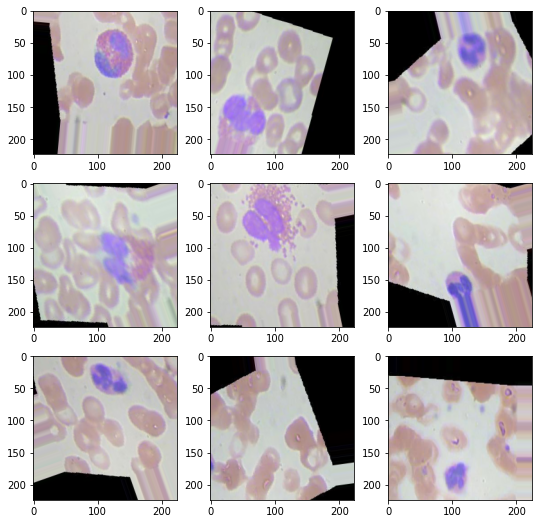

In [12]:
# Visualiasi data Validation
plt.figure(figsize=(9,9))
for i in range(9):
    # 3x3 grid
    plt.subplot(330 + 1 + i)
    batch = validation_generator.next()[0]
    image = batch[0]
    plt.imshow(image)
plt.show();

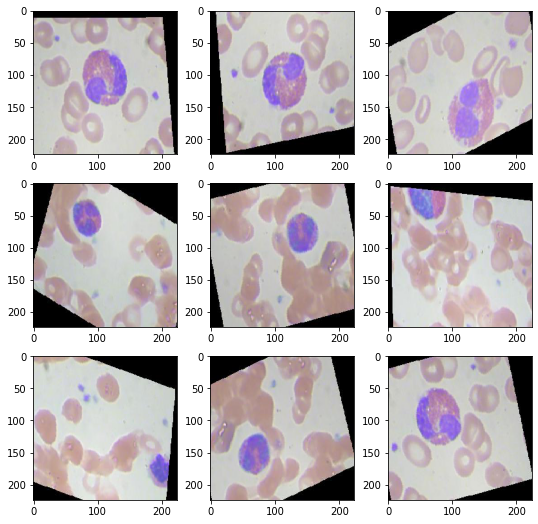

In [13]:
# Visualisasi Data Test
plt.figure(figsize=(9,9))
for i in range(9):
    # 3x3 grid
    plt.subplot(330 + 1 + i)
    batch = test_generator.next()[0]
    image = batch[0]
    plt.imshow(image)
plt.show();

### Membuat visualisasi proporsi Dataset

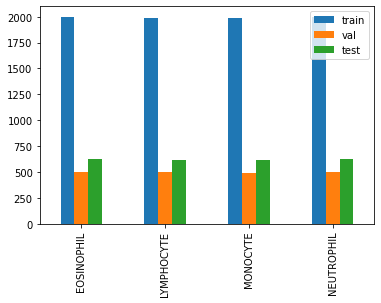

In [14]:
class_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

_, train_counts = np.unique(train_generator.classes, return_counts = True)
_, val_counts = np.unique(validation_generator.classes, return_counts = True)
_, test_counts = np.unique(test_generator.classes, return_counts = True)

pd.DataFrame({'train': train_counts, "val": val_counts, "test": test_counts}, index = class_names).plot.bar()

plt.show()

In [15]:
pd.DataFrame({'Train': train_counts, 
              "Val": val_counts, 
              "Test": test_counts}, 
             index = class_names)

,Train,Val,Test
EOSINOPHIL,1998,499,623
LYMPHOCYTE,1987,496,620
MONOCYTE,1983,495,620
NEUTROPHIL,2000,499,624


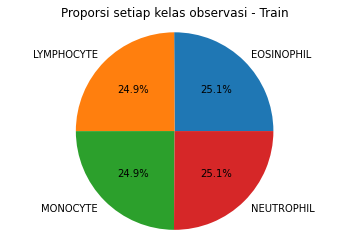

In [16]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proporsi setiap kelas observasi - Train')
plt.show()

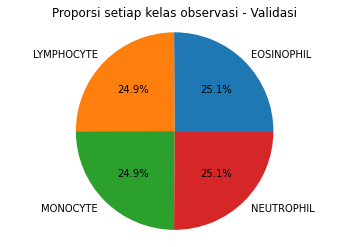

In [17]:
plt.pie(val_counts,
        explode=(0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proporsi setiap kelas observasi - Validasi')
plt.show()

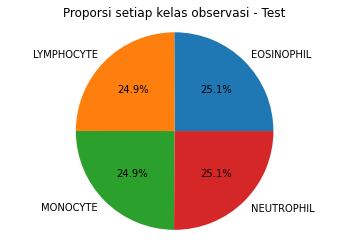

In [18]:
plt.pie(test_counts,
        explode=(0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proporsi setiap kelas observasi - Test')
plt.show()

> Berdasarkan visuaslisasi dari 3 dataset yang kita miliki, data semua balance atau seimbang artinya tidak perlu untuk melakukan tahapan balancing dataset lagi

## **Build Model VGG19**

In [54]:
vgg19 = tf.keras.applications.VGG19(include_top=False, 
                                    weights='imagenet',
                                    input_tensor=None,
                                    input_shape=(224, 224, 3), 
                                    pooling = 'max',
                                    classes=4,
                                    classifier_activation='softmax') 
print(vgg19.summary())  #membaca summary model

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Kode diatas merupakan tahapan pembuatan model menggunakan VGG19 dari modul aplikasi TensorFlow Keras. Model VGG19 ini meurpakan salah satu model CNN untuk klasifikasi gambar. Parameter yang digunakan pada kode diatas yakni:

* **`include_top`** = **False** artinya lapisan yang terhubung sepenuhnya di bagian atas model, yang digunakan untuk klasifikas tidak akan diikutsertakan.

* **`weights`** = `imagenet` menetapkan bahwa model harus diinisialisasi dengan bobot yang telah dilatih sebelumnya dari kumpulan data ImageNet.

* **`input_tensor`** = **None** berarti tidak ada tensor input yang akan diteruskan ke model.

* **`input_shape`** = **(224, 224, 3)** mengatur bentuk gambar input menjadi 224x224 piksel dan 3 saluran warna (RGB) Red, Green, Blue atau berwarna.

* **`pooling`** = `max` menentukan bahwa max pooling harus digunakan dalam model. Dimana, max pooling ini merupakan salah satu teknik untuk downsample dimensi dari iamge pada CNN sambil mempertahankan fitur-fitur penting didalamnya. 

* **`classes`** = **4** menetapkan bahwa model harus dilatih untuk mengklasifikasikan gambar ke dalam 4 kelas.

* **`classifier_activation`** = `softmax` menetapkan bahwa fungsi aktivasi softmax harus digunakan pada lapisan klasifikasi akhir model.

### Model VGG19

Kode dibawah berguna untuk membuat model (VGG19) menggunakan fungsi dari Sequential API dari Keras yang mana memungkinkan kita menambah layer satu persatu kemudian memodifikasi layer dari model VGG19.

Kode looping dibawah dibuat sebagai cara untuk menyempurnakan model VGG19 yang telah dilatih sebelumnya pada kumpulan data baru. Dengan membekukan lapisan bawah model, proses pelatihan hanya akan memperbarui bobot dari 4 lapisan terakhir, yang memungkinkan model beradaptasi dengan data baru sambil tetap memanfaatkan bobot yang telah dilatih sebelumnya di lapisan bawah.

In [55]:
print("Terdapat {} layers pada model VGG19".format(len(vgg19.layers)))

Terdapat 23 layers pada model VGG19


In [56]:
model = Sequential()

# looping pertama
for layer in vgg19.layers[:-3]: #melakukan subset dari layer kecuali 3 terakhir agar tidak dilakukan pelatihan. Artinya lapisan yang dilakukan pelatihan hanya 19 lapisan dari atas yang tetap dapat dilatih.
  layer.trainable=False

#looping kedua
for layer in vgg19.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f63a04a8650> False
<keras.layers.convolutional.Conv2D object at 0x7f63504b9c10> False
<keras.layers.convolutional.Conv2D object at 0x7f63a050ec50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f63a00d2bd0> False
<keras.layers.convolutional.Conv2D object at 0x7f63a04d67d0> False
<keras.layers.convolutional.Conv2D object at 0x7f63a05166d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6350213b90> False
<keras.layers.convolutional.Conv2D object at 0x7f6350219810> False
<keras.layers.convolutional.Conv2D object at 0x7f63502233d0> False
<keras.layers.convolutional.Conv2D object at 0x7f6350219310> False
<keras.layers.convolutional.Conv2D object at 0x7f6350223e90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f6350232390> False
<keras.layers.convolutional.Conv2D object at 0x7f6350232190> False
<keras.layers.convolutional.Conv2D object at 0x7f6350537410> False
<keras.layers.convolutional.Conv2D object at 0x7f63c1d84b90>

In [57]:
# Add the vgg convolutional base model
model.add(vgg19)
 
# Add new layers
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

Kode diatas merupakan tahapan dalam membuat model menggunakan CNN dengan arsitektur VGG19. Model diatas dutambah beberapa lapisan, dimana lapisan pertama dengan `model.add(vgg19)` dimana memanggil model VGG19 yang sebelumnya sudah di run dan dilatih sebelumnya sebagai titik awal training model. 
Setelah itu, kita menambahkan beberapa layer baru kedalam model. Rincian pada setiap layer:

* `Flatten()`: Lapisan ini berguna untuk meratakan output dari lapisan sebelumnya, yang diperlukan untuk menyiapkan data untuk lapisan yang terhubung sepenuhnya.

* `BatchNormalization()`: Lapisan ini berguna untuk menormalkan output dari lapisan sebelumnya, yang dapat membantu meningkatkan kinerja model dengan mengurangi pergeseran kovariat internal.

* `Dense(32, activation='relu' )`: Lapisan ini adalah lapisan yang terhubung sepenuhnya dengan 32 neuron dan fungsi aktivasi unit linier yang diperbaiki dengan (ReLU). Fungsi aktivasi ReLU digunakan untuk memperkenalkan non-linearitas dalam model.

* `Dropout(0.2)`: Lapisan ini digunakan untuk mencegah overfitting dengan menonaktifkan secara acak 20% neuron di lapisan sebelumnya selama pelatihan.

Lapisan di atas diulang beberapa kali, dengan jumlah neuron di lapisan padat berkurang setiap kali, dan lapisan terakhir adalah lapisan **`Dense(4, activation='softmax')`** yang terhubung sepenuhnya dengan 4 neuron dan fungsi aktivasi softmax. Fungsi softmax digunakan untuk klasifikasi multi-kelas, di mana ia menghitung probabilitas untuk setiap kelas.

Terakhir, **`model.summary()`** fungsi tersebut digunakan untuk mencetak ringkasan arsitektur model, termasuk jumlah parameter untuk setiap lapisan.

In [58]:
from random import seed
seed(123)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

Kode diatas digunakan untuk mengkompilasi model vgg19. Pengaturan ini diperlukan agar model dapat melatih dan mengevaluasi kinerjanya.

1. Fungsi pertama yakni `loss` -> berfungsi untuk menentukan fungsi kerugian yang digunakan selama proses training. Dalam hal ini, fungsi loss yang digunakan adalah `categorical_crossentropy`, yang merupakan fungsi loss yang umum digunakan untuk klasifikasi multi-kelas. Fungsi loss ini mengukur perbedaan antara probabilitas kelas yang diprediksi dan label kelas yang sebenarnya.

2. Fungsi kedua yakni `optimizer` -> berfungsi untuk menentukan algoritma optimal yang akan digunakan untuk memperbaharui bobot model selama proses training. Dalam hal ini, algoritma yang digunakan uakni `Adam` dengan learning rate = 0,001. Adam ini merupakan algoritma yang paling populer yang mana merupakan gabungan fari algoritma AdaGrad dan RMSProp.

3. Fungsi ketiga yakni `metrics` -> berfungsi untuk menentukan metrik apa yang akan digunakan dalam proses evaluasi model selama proses training dan testing. Dalam hal ini, metrik yang digunakan yakni `accuracy` yang merupakan proporsi insttance yang diklasifikasikan dengan benar.

In [32]:
# Variabel history akan menyimpan riwayat pelatihan model, yang nantinya dapat digunakan untuk memvisualisasikan kinerja model selama training.
history = model.fit(train_generator, #turunan dari ImageDataGenerator yang berisi data gambar untuk dataset train
                    epochs=20,#menentukan berapa kali model akan mengulang seluruh dataset train.
                    validation_data=validation_generator, #digunakan untuk menentukan set validasi yang akan digunakan untuk mengevaluasi performa model selama trainign. 
                    verbose=1) #digunakan untuk menentukan tingkat detail yang akan dicetak ke konsol selama pelatihan


Epoch 1/20
249/249 [==============================] - 142s 570ms/step - loss: 0.2373 - accuracy: 0.9283 - val_loss: 0.0889 - val_accuracy: 0.9693
Epoch 2/20
249/249 [==============================] - 141s 566ms/step - loss: 0.2191 - accuracy: 0.9331 - val_loss: 0.1061 - val_accuracy: 0.9653
Epoch 3/20
249/249 [==============================] - 142s 569ms/step - loss: 0.2299 - accuracy: 0.9308 - val_loss: 0.1111 - val_accuracy: 0.9618
Epoch 4/20
249/249 [==============================] - 139s 558ms/step - loss: 0.2213 - accuracy: 0.9340 - val_loss: 0.0679 - val_accuracy: 0.9779
Epoch 5/20
249/249 [==============================] - 141s 568ms/step - loss: 0.2014 - accuracy: 0.9380 - val_loss: 0.0488 - val_accuracy: 0.9849
Epoch 6/20
249/249 [==============================] - 139s 559ms/step - loss: 0.1982 - accuracy: 0.9398 - val_loss: 0.1519 - val_accuracy: 0.9492
Epoch 7/20
249/249 [==============================] - 138s 556ms/step - loss: 0.1893 - accuracy: 0.9375 - val_loss: 0.1090 -

In [59]:
# Variabel history akan menyimpan riwayat pelatihan model, yang nantinya dapat digunakan untuk memvisualisasikan kinerja model selama training.
history0 = model.fit(train_generator, #turunan dari ImageDataGenerator yang berisi data gambar untuk dataset train
                    epochs=50,#menentukan berapa kali model akan mengulang seluruh dataset train.
                    callbacks=[tf.keras.callbacks.EarlyStopping( #memonitor validasi loss dan menghentikan proses pelatihan jika validasi loss tidak membaik selama 3 epoch. Ini juga mengembalikan bobot model terbaik.
                        monitor='val_loss',
                        patience=3,
                        restore_best_weights=True)],#digunakan untuk menentukan daftar callback yang akan dipanggil pada titik berbeda selama training
                    validation_data=validation_generator, #digunakan untuk menentukan set validasi yang akan digunakan untuk mengevaluasi performa model selama training. 
                    verbose=1) #digunakan untuk menentukan tingkat detail yang akan dicetak ke konsol selama pelatihan


Epoch 1/50
249/249 [==============================] - 147s 585ms/step - loss: 1.2553 - accuracy: 0.4590 - val_loss: 0.8857 - val_accuracy: 0.6898
Epoch 2/50
249/249 [==============================] - 142s 568ms/step - loss: 0.8895 - accuracy: 0.6514 - val_loss: 0.6069 - val_accuracy: 0.7828
Epoch 3/50
249/249 [==============================] - 141s 565ms/step - loss: 0.6630 - accuracy: 0.7627 - val_loss: 0.4013 - val_accuracy: 0.8713
Epoch 4/50
249/249 [==============================] - 140s 561ms/step - loss: 0.5271 - accuracy: 0.8213 - val_loss: 0.2632 - val_accuracy: 0.9150
Epoch 5/50
249/249 [==============================] - 141s 567ms/step - loss: 0.4577 - accuracy: 0.8410 - val_loss: 0.2199 - val_accuracy: 0.9301
Epoch 6/50
249/249 [==============================] - 141s 566ms/step - loss: 0.3920 - accuracy: 0.8651 - val_loss: 0.2372 - val_accuracy: 0.9170
Epoch 7/50
249/249 [==============================] - 140s 561ms/step - loss: 0.3720 - accuracy: 0.8726 - val_loss: 0.1629 -

## **Evaluasi Model VGG19**

Melakukan save model vgg19 yang sudah dibuat dalam format `.h5`

In [60]:
### Save Model VGG19
model.save("/kaggle/working/model_vgg19_0.h5") #dari pakai  callback 

In [33]:
### Save Model VGG19
model.save("/kaggle/working/model_vgg19_1.h5") #dari tanpa callback

In [42]:
model.save("/kaggle/working/model_vgg19_2.h5") #dari menggunakan callback

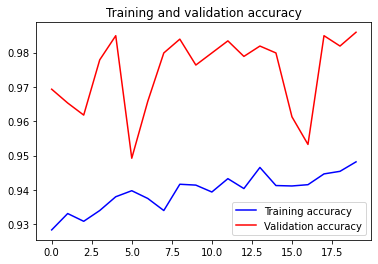

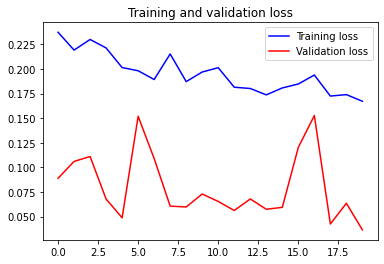

In [34]:
#Menampilkan plot dari training tanpa callbacks

accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(accuracy))
 
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

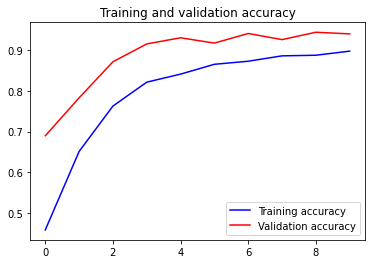

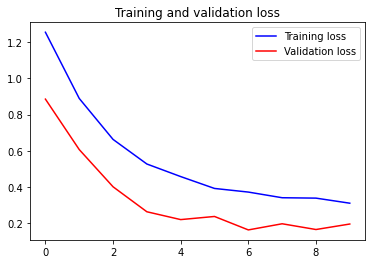

In [61]:
#Menampilkan plot dari menggunakan callbacks

accuracy = history0.history['accuracy']
val_acc = history0.history['val_accuracy']
loss = history0.history['loss']
val_loss = history0.history['val_loss']
 
epochs = range(len(accuracy))
 
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Berdasarkan hasil percobaan training menggunakan callbacks dan tidak, terjadi perbedaan output grafik history dari akurasi. Dimana, jika menggunakan callbacks tampilan akan lebih smooth ketimbang tiadak menggunakan callbacks.Lalu hasil yang ditampilkan callbacks lebih baik akurasi pada data test ketimbang tidak menggunakan callbacks.

In [27]:
CLASS_NAMES = list(train_generator.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [63]:
model0=load_model("/kaggle/working/model_vgg19_0.h5") #tanpa callbacks

In [28]:
model=load_model("/kaggle/working/model_vgg19_1.h5") #tanpa callbacks

In [44]:
model2=load_model("/kaggle/working/model_vgg19_2.h5") #menggunakan callbacks

Test Accuracy: 72.819%


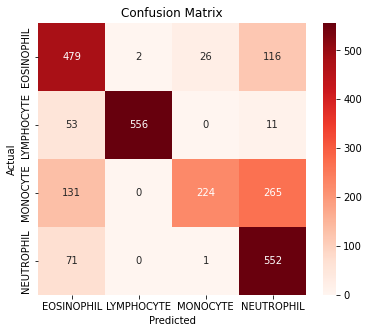

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.65      0.77      0.71       623
  LYMPHOCYTE       1.00      0.90      0.94       620
    MONOCYTE       0.89      0.36      0.51       620
  NEUTROPHIL       0.58      0.88      0.70       624

    accuracy                           0.73      2487
   macro avg       0.78      0.73      0.72      2487
weighted avg       0.78      0.73      0.72      2487



In [35]:
predictions = np.argmax(model.predict(test_generator), axis=1) # 

acc = accuracy_score(test_generator.labels, predictions)
cm = tf.math.confusion_matrix(test_generator.labels, predictions)
clr = classification_report(test_generator.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=True)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Test Accuracy: 74.266%


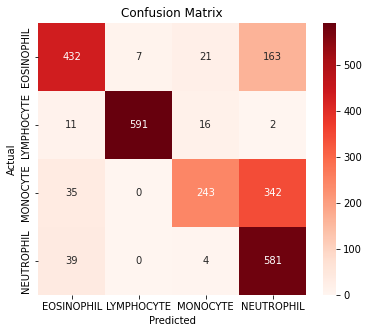

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.84      0.69      0.76       623
  LYMPHOCYTE       0.99      0.95      0.97       620
    MONOCYTE       0.86      0.39      0.54       620
  NEUTROPHIL       0.53      0.93      0.68       624

    accuracy                           0.74      2487
   macro avg       0.80      0.74      0.74      2487
weighted avg       0.80      0.74      0.74      2487



In [64]:
#Prediksi menggunakan histroy model yang di running menggunakan callbakcs
predictions = np.argmax(model0.predict(test_generator), axis=1) # 

acc = accuracy_score(test_generator.labels, predictions)
cm = tf.math.confusion_matrix(test_generator.labels, predictions)
clr = classification_report(test_generator.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=True)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Validation Accuracy: 94.268%


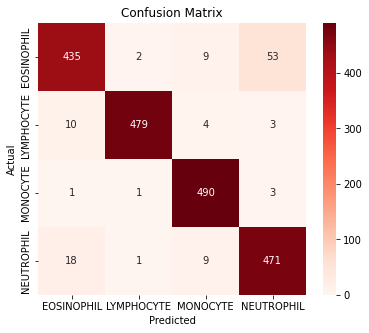

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.94      0.87      0.90       499
  LYMPHOCYTE       0.99      0.97      0.98       496
    MONOCYTE       0.96      0.99      0.97       495
  NEUTROPHIL       0.89      0.94      0.92       499

    accuracy                           0.94      1989
   macro avg       0.94      0.94      0.94      1989
weighted avg       0.94      0.94      0.94      1989



In [67]:
predictions = np.argmax(model0.predict(validation_generator), axis=1) # 

acc = accuracy_score(validation_generator.labels, predictions)
cm = tf.math.confusion_matrix(validation_generator.labels, predictions)
clr = classification_report(validation_generator.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=True)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

78/78 [==============================] - 12s 154ms/step - loss: 0.8577 - accuracy: 0.7427
Loss of the model is -  0.8576688766479492
Accuracy of the model is -  74.26618337631226 %
              precision    recall  f1-score   support

  EOSINOPHIL       0.84      0.69      0.76       623
  LYMPHOCYTE       0.99      0.95      0.97       620
    MONOCYTE       0.86      0.39      0.54       620
  NEUTROPHIL       0.53      0.93      0.68       624

    accuracy                           0.74      2487
   macro avg       0.80      0.74      0.74      2487
weighted avg       0.80      0.74      0.74      2487

Confusion Matrix


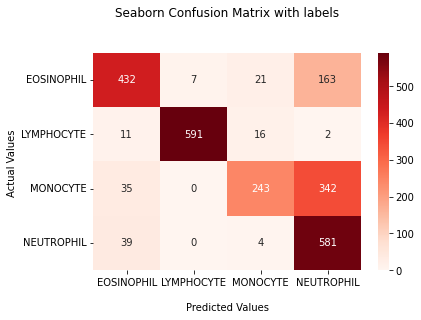

In [66]:
# Confussion Matrix dengan data test pada model terbaik yakni model0
def evaluate_model(model0, test_generator):
  evaluate = model0.evaluate(test_generator)
  print('Loss of the model is - ', evaluate[0])
  print('Accuracy of the model is - ', evaluate[1]*100, '%')

  classes =  list(test_generator.class_indices.keys())
  Y_pred = model.predict(test_generator)
  y_pred = np.argmax(Y_pred, axis=1)
  
  print(classification_report(test_generator.classes, y_pred, target_names=classes))
  print('Confusion Matrix')


  # acc = accuracy_score(validation_generator.labels, predictions)
  # cm = tf.math.confusion_matrix(validation_generator.labels, predictions)
  # clr = classification_report(validation_generator.labels, predictions, target_names=CLASS_NAMES)

  conf_matrix = confusion_matrix(test_generator.classes, y_pred)
  df_cm = pd.DataFrame(conf_matrix, index = classes, columns = classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=True)

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  
  ## Ticket labels - List must be in alphabetical order

evaluate_model(model0, test_generator)

In [68]:
# Model VGG19
print("The best Training accuracy = {:.3f}%".format(max(accuracy)*100))
print("The best validation accuracy = {:.3f}% ".format(max(val_acc)*100))
print("The best Test accuracy =",(model0.evaluate(test_generator)[1]*100))

The best Training accuracy = 89.734%
The best validation accuracy = 94.369% 
78/78 [==============================] - 13s 159ms/step - loss: 0.8577 - accuracy: 0.7427
The best Test accuracy = 74.26618337631226


**Hasil image classification menggunakan model VGG19 pada data sel darah putih diatas menghasilkan accuracy sebesar:**
> The best Training accuracy = 89.734%\
> The best validation accuracy = 94.369% \
> The best Test accuracy = 74.266%

---

# **RESNET50**

Berdasarkan model VGG19 diatas, hasil evaluasi pada data test masih rendah sehingga kita mencoba untuk membuat dengan model lain yakni ResNet50. Tahapan yang dilakukan kurang lebih sama dengan proses pemodelan sebelumnya, hanya saja berbeda pada tahapan pembuatan model.

## **Load Data Image ResNet50**

In [72]:
# Creating data generator object with the same preprocessing done in the Resnet
train_data = ImageDataGenerator(rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest',
                                 validation_split=0.2,
                                 preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
test_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

Kode diatas merupakan tahapan membuat dua objek `ImageDataGenerator`, satu untuk data training (train_data) dan satu untuk data uji (test_data), untuk menerapkan preprocessing gambar dan teknik augmentasi data ke data.

Generator `train_data` akan menerapkan beberapa teknik augmentasi gambar termasuk rotasi, pergeseran, pemotongan, pembesaran, dan pembalikan. Ini juga menentukan mode isian (terdekat) dan menyetel pemisahan validasi sebesar 20%. Selain itu, ia menggunakan fungsi pre-processing dari ResNet50 `(tf.keras.applications.resnet50.preprocess_input)` untuk melakukan pre-processing gambar masukan sebelum melatih model.

Generator `test_data` hanya menerapkan fungsi pre-processing ResNet50 ke gambar uji.

**Augmentasi Gambar**

In [73]:
# Load the training data
train_gen = train_data.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical', 
        seed=42,
        subset = "training")

# Load the validation data
validation_gen = train_data.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False,
        seed=42,
        subset='validation')

# Load the test data
test_gen = test_data.flow_from_directory(
        test_path,
        shuffle=False, 
        batch_size=32,
        class_mode='categorical',
        seed=42,
        target_size=(224, 224))

print(test_gen.class_indices)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}


**Visualisasi Gambar**

min: -123.68 max: 142.061


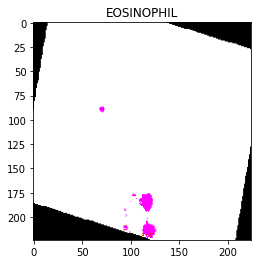

In [74]:
# Extract the labels 
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
      labels[v] = k
# should be a strangely colored image (due to Resnet weights being RGB)
# cek gambar sample yang diproses oleh model untuk data test akan seperti apa
for x, y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

Pada tampilan data test diatas menggunakan model resnet, hasilnya seperti pemotongan object selnya saja yang akan ditest pada model bukan hasil gambar RGB nya.

In [75]:
from glob import glob
from keras.preprocessing import image

train_image_files = glob(train_path + "/*/*.jp*g")
validation_image_files = glob(test_path + "/*/*.jp*g")
print(f"Number of Training samples: {len(train_image_files)}")
print(f"Number of Test samples: {len(validation_image_files)}")

Number of Training samples: 9957
Number of Test samples: 2487


In [76]:
spe = int(len(train_image_files)//BATCH_SIZE)
val = int(len(validation_image_files)//BATCH_SIZE)
print(f"Training steps per epoch: {spe}")
print(f"Validation steps per epoch: {val}")
print(f"Number of epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")

Training steps per epoch: 311
Validation steps per epoch: 77
Number of epochs: 20
Batch size: 32


Banyaknya kelas: 4


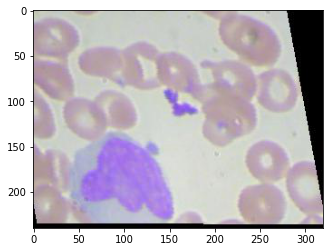

In [77]:
folders = glob(train_path + '/*')
k = len(folders)
print(f"Banyaknya kelas: {k}")

# Display a image 
plt.imshow(image.img_to_array(image.load_img(train_image_files[0])).astype('uint8'))
plt.show()

## **Build Model ResNet50**

In [69]:
input_tensor = Input(shape=(224, 224, 3)) #mewakili ukuran gambar (tinggi dan lebar) yang diharapkan model sebagai input.
EPOCHS = 20 #menentukan berapa kali algoritma deep learning bekerja melewati seluruh dataset baik secara forward maupun backward.
BATCH_SIZE = 32 #Batch size adalah jumlah sampel data yang biasanya melewati jaringan saraf pada satu waktu. Batch size menentukan jumlah sampel yang harus dikerjakan sebelum memperbarui parameter model internal.

x = Lambda(tf.keras.applications.resnet50.preprocess_input)(input_tensor)
resnet = ResNet50(input_tensor= x, 
                  weights='imagenet', #download weight trained on imagenet (an image dataset that has contain 1000 classes)
                  include_top=False,) #Don't add fully connected layers

94781440/94765736 [==============================] - 1s 0us/step


Kode diatas merupakan proses pembuatan model dengan arsitektur ResNet50 dari library Keras.
* `input_shape`: Diatur ke **IMAGE_SIZE + [3]**, artinya model mengharapkan bentuk input **224x224x3**, di mana dimensi terakhir mengacu pada jumlah saluran warna (RGB) pada gambar.
* `weights`: Diatur ke `imagenet`, yang berarti bahwa model akan diinisialisasi dengan bobot yang telah dilatih sebelumnya dari kumpulan data ImageNet.
* `include_top`: Ini diatur ke **False**, yang berarti bahwa lapisan yang terhubung sepenuhnya di bagian atas model tidak akan disertakan. Ini berguna ketika kita ingin menggunakan model sebagai ekstraktor fitur.

In [70]:
print("There are {} layers in model".format(len(resnet.layers)))

There are 176 layers in model


In [71]:
for layer in resnet.layers[:140]: 
    layer.trainable = False

resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
___________________________________________________________________________________________

* Kita tidak ingin melatih semua model, karena semua operator convolutional pada layer pertama mengekstraksi fitur yang serupa seperti garis sederhana. Sehingga kita hanya perlu melatih model pada lapisan pertama saja. 

* jadi kita melakukan pembekuan model n ada lapisan pertama

In [79]:

# Pre-trained ResNet50 Model and Modifying
# Add a new dense layer on top of the base model
x = GlobalAveragePooling2D()(resnet.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
pred = Dense(4, activation='softmax')(x)

# inputs = Input(shape=(224, 224, 3))
model_resnet = Model(inputs=resnet.input, outputs=pred)
model_resnet.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
model_resnet.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
______________________________________________________________________________________________

Kode diatas merupakan tahap **pre-trained model:**
Looping pertama digunaan untuk membekukan layer pada model. Dimana ketika layer dibekukan, bobot (weight)nya tidak akan diperbarui selama training. Hal ini berguna untuk mempertahankan fitur yang dipelajari dari tugas awal saat melatih tugas baru.

In [80]:
history_res = model_resnet.fit(train_gen,
                                epochs=15,
                                validation_data=validation_gen)

Epoch 1/15
249/249 [==============================] - 148s 576ms/step - loss: 0.4531 - accuracy: 0.8278 - val_loss: 0.2622 - val_accuracy: 0.9140
Epoch 2/15
249/249 [==============================] - 141s 567ms/step - loss: 0.1812 - accuracy: 0.9362 - val_loss: 0.3952 - val_accuracy: 0.8416
Epoch 3/15
249/249 [==============================] - 139s 558ms/step - loss: 0.1191 - accuracy: 0.9561 - val_loss: 0.1142 - val_accuracy: 0.9542
Epoch 4/15
249/249 [==============================] - 139s 560ms/step - loss: 0.0814 - accuracy: 0.9705 - val_loss: 0.0872 - val_accuracy: 0.9708
Epoch 5/15
249/249 [==============================] - 140s 560ms/step - loss: 0.0563 - accuracy: 0.9794 - val_loss: 0.1168 - val_accuracy: 0.9583
Epoch 6/15
249/249 [==============================] - 138s 555ms/step - loss: 0.0870 - accuracy: 0.9733 - val_loss: 0.0721 - val_accuracy: 0.9759
Epoch 7/15
249/249 [==============================] - 139s 559ms/step - loss: 0.0420 - accuracy: 0.9862 - val_loss: 0.0700 -

In [ ]:
# history_resnet = model_resnet.fit(train_gen,
#                           validation_data=validation_gen,
#                           epochs=EPOCHS,
#                           steps_per_epoch=spe,
#                           validation_steps= val,
#                           verbose=1)
# history_resnet =  model_resnet.fit(train_gen, #turunan dari ImageDataGenerator yang berisi data gambar untuk dataset train
#                     epochs=50,#menentukan berapa kali model akan mengulang seluruh dataset train.
#                     callbacks=[tf.keras.callbacks.EarlyStopping( #memonitor validasi loss dan menghentikan proses pelatihan jika validasi loss tidak membaik selama 3 epoch. Ini juga mengembalikan bobot model terbaik.
#                         monitor='val_loss',
#                         patience=3,
#                         restore_best_weights=True)],#digunakan untuk menentukan daftar callback yang akan dipanggil pada titik berbeda selama training
#                     validation_data=validation_gen, #digunakan untuk menentukan set validasi yang akan digunakan untuk mengevaluasi performa model selama trainign. 
#                     verbose=1) #digunakan untuk menentukan tingkat detail yang akan dicetak ke konsol selama pelatihan


In [ ]:
#Save Model MVNET 
model_resnet.save("/kaggle/working/model_resnet_2.h5")

In [85]:
model_resnet=load_model("/kaggle/working/model_resnet_2.h5") #hasil terbaik 

## **Evaluasi MODEL RESNET50** 


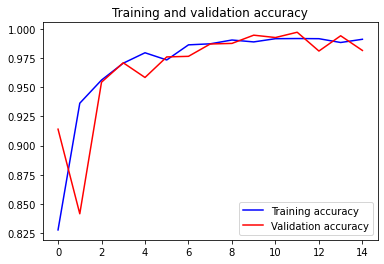

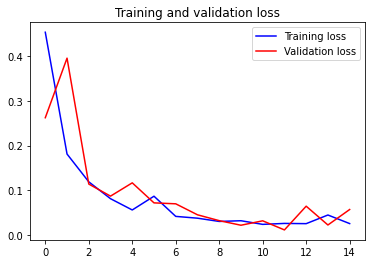

In [83]:
#Menampilkan plot 
accuracy = history_res.history['accuracy']
val_acc = history_res.history['val_accuracy']
loss = history_res.history['loss']
val_loss = history_res.history['val_loss']
 
epochs = range(len(accuracy))
 
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

78/78 [==============================] - 11s 123ms/step - loss: 1.1270 - accuracy: 0.8110
Loss of the model is -  1.1269797086715698
Accuracy of the model is -  81.10172748565674 %
              precision    recall  f1-score   support

  EOSINOPHIL       0.81      0.82      0.81       623
  LYMPHOCYTE       0.96      0.88      0.92       620
    MONOCYTE       0.85      0.63      0.73       620
  NEUTROPHIL       0.69      0.91      0.78       624

    accuracy                           0.81      2487
   macro avg       0.83      0.81      0.81      2487
weighted avg       0.83      0.81      0.81      2487

Confusion Matrix


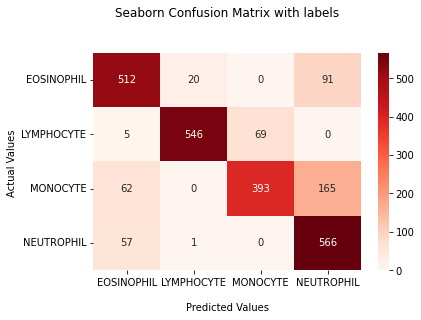

In [86]:
# Confussion Matrix dengan data test
def evaluate_model(model_resnet, test_gen):
  evaluate = model_resnet.evaluate(test_gen)
  print('Loss of the model is - ', evaluate[0])
  print('Accuracy of the model is - ', evaluate[1]*100, '%')

  classes =  list(test_gen.class_indices.keys())
  Y_pred = model_resnet.predict(test_gen)
  y_pred = np.argmax(Y_pred, axis=1)
  
  print(classification_report(test_gen.classes, y_pred, target_names=classes))
  print('Confusion Matrix')


  # acc = accuracy_score(validation_generator.labels, predictions)
  # cm = tf.math.confusion_matrix(validation_generator.labels, predictions)
  # clr = classification_report(validation_generator.labels, predictions, target_names=CLASS_NAMES)

  conf_matrix = confusion_matrix(test_gen.classes, y_pred)
  df_cm = pd.DataFrame(conf_matrix, index = classes, columns = classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=True)

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  
  ## Ticket labels - List must be in alphabetical order

evaluate_model(model_resnet, test_gen)

In [87]:
# Model Resnet
print("The best Training accuracy = {:.3f}%".format(max(accuracy)*100))
print("The best validation accuracy = {:.3f}% ".format(max(val_acc)*100))
print("The best Test accuracy =",(model_resnet.evaluate(test_gen)[1]*100))

The best Training accuracy = 99.159%
The best validation accuracy = 99.698% 
78/78 [==============================] - 10s 122ms/step - loss: 1.1270 - accuracy: 0.8110
The best Test accuracy = 81.10172748565674


Hasil dari evaluasi model menggunakan Resnet50 yakni:
> The best Training accuracy = 99.159%\
> The best validation accuracy = 99.698% \
> The best Test accuracy = 81.102%

Dari hasil diatas dapat kita lihat bahwa, masih terdapat overfitting karena pada data test nya turun 18% dari hassil train dan validasinya. 

---

# **MOBILENETV2**

**MobileNetV2** adalah arsitektur CNN yang dirancang khusus untuk perangkat seluler dan tersemat, dengan fokus pada efisiensi dan kecepatan. Ini adalah versi yang lebih ringan dan lebih cepat dari arsitektur MobileNet asli, dan dikenal karena kinerjanya yang baik pada berbagai tugas klasifikasi gambar sekaligus lebih efisien secara komputasi daripada VGG19 dan Resnet50.

Di sisi lain, **VGG19 dan ResNet50** keduanya adalah arsitektur CNN populer yang telah dilatih pada kumpulan data ImageNet, yang merupakan kumpulan data gambar yang besar dan label yang sesuai. VGG19 dikenal karena kinerjanya yang baik pada kumpulan data ImageNet dan kemampuannya untuk mengekstraksi fitur canggih dari gambar. ResNet50, di sisi lain, dikenal karena kemampuannya untuk melatih jaringan yang sangat dalam tanpa mengalami masalah gradien menghilang dan kinerjanya yang baik pada kumpulan data Imagenet.

Saat membandingkan MobileNetV2 dengan VGG19 dan ResNet50, satu perbedaan utama adalah jumlah parameter. MobileNetV2 memiliki parameter yang jauh lebih sedikit daripada VGG19 dan ResNet50. Ini berarti bahwa MobileNetV2 membutuhkan lebih sedikit memori dan sumber daya komputasi.

Perbedaan utama lainnya adalah biaya komputasi, MobileNetV2 dirancang agar lebih efisien dalam hal komputasi dan karena itu lebih cepat dijalankan di perangkat seluler dan tersemat.

> Singkatnya, MobileNetV2 adalah model komputasi yang lebih efisien dibandingkan dengan VGG19 dan ResNet50, dan sangat cocok untuk perangkat seluler dan tersemat. Namun, VGG19 dan ResNet50 adalah model yang lebih kuat yang telah dilatih pada kumpulan data besar dan telah terbukti bekerja dengan baik pada berbagai tugas klasifikasi gambar. Model terbaik untuk digunakan akan bergantung pada karakteristik khusus dari kumpulan data, masalah yang Anda coba selesaikan, dan sumber daya yang Anda miliki.


## **Load Data Image MobileNet50**

Memuat data dengan menggunakan fungsi preprocessing **preprocess_input** dari modul **mobilenet_v2** dari paket **tf.keras.applications**. Fungsi ini khusus untuk arsitektur MobileNetV2 dan digunakan untuk menyiapkan gambar masukan untuk model. Tidak cocok untuk digunakan dengan model lain seperti VGG19 atau ResNet50.

In [123]:
# Create generators
train_gen_mobile = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
) #Membagi data train menjadi train dan validation dengan proporsi 80% dan 20%

test_gen_mobile = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

Dalam kode yang dibawah ini:\
**data train** diteruskan ke **`train_gen_mobile.flow_from_directory`** dengan **subset='training'** \
**data validasi** diteruskan ke **`train_gen_mobile.flow_from_directory`** dengan **subset='validation'**, \
dengan cara ini gambar set validasi tidak ditambah, dan \
**data test** diteruskan ke **`test_gen_mobile.flow_from_directory`** dengan **shuffle=False** => yang berarti bahwa gambar tidak ditambah. Dengan cara ini kita dapat memastikan bahwa validasi dan test tidak ditambah atau tidak dilakukan augmentasi seperti pada data train.

Penting untuk kita pisahkan set validasi dan set train dari set test dan juga untuk tidak menggunakan teknik augmentasi data apa pun pada mereka karena ini dapat memberi kita evaluasi yang lebih realistis tentang kinerja model yang telah kita buat pada data yang tidak terlihat (test).

Singkatnya, tidak disarankan untuk menerapkan augmentasi pada data ke set validasi dan pengujian, karena dapat menyebabkan overfitting dan dapat memberikan estimasi kinerja model yang terlalu optimis. Kode yang disediakan tidak menambah validasi dan set pengujian, ini merupakan praktik yang baik.

In [124]:
train_images=train_gen_mobile.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images=train_gen_mobile.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images=test_gen_mobile.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


## **Build Pre Trained Model MobileNetV2**

In [125]:
# Load pretrained model
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# The convolutional layers have already been optimized to extract features
pretrained_model.trainable = False

Kode diatas memuat versi pretrained model MobileNetV2 dari modul **tf.keras.applications** TensorFlow, dengan 
* `input shape` = (224.224,3), artinya model mengharapkan gambar dengan tinggi dan lebar 224 piksel dan 3 saluran warna (merah, hijau, biru) dimana ini merupakan hasil perubahan dimensi gambar awal dari 320x240 piksel. 
* `include_top` = False, artinya lapisan atas model (lapisan klasifikasi) tidak disertakan. 
* `weights` = `imagenet`, artinya model akan diinisialisasi dengan bobot yang telah dilatih sebelumnya dari kumpulan data ImageNet. 
* `pooling`= diatur ke **'max'**, artinya pooling maksimal global akan digunakan sebagai keluaran model.

`pretrained_model.trainable` = False, artinya menetapkan semua lapisan dalam model menjadi tidak dapat dilatih, yang berarti bahwa parameter lapisan tidak akan diperbarui selama proses training. Hal ini berguna saat menggunakan model pra-pelatihan sebagai ekstraktor fitur, karena memastikan bahwa fitur yang dipelajari tidak berubah selama pelatihan.






In [133]:
print("There are {} layers in model".format(len(pretrained_model.layers)))

There are 154 layers in model


## **Build Classification Model MobileNetV2**

In [134]:
inputs = pretrained_model.input

x = GlobalAveragePooling2D()(pretrained_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x) #terdapat 4 kelas klasifikasi gambar 

model_mvnet = tf.keras.Model(inputs=inputs, outputs=outputs)

model_mvnet.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [135]:
history_mvnet = model_mvnet.fit(
    train_images,
    validation_data=val_images,
    epochs=20)

Epoch 1/20
249/249 [==============================] - 33s 125ms/step - loss: 0.8549 - accuracy: 0.6388 - val_loss: 0.6555 - val_accuracy: 0.7185
Epoch 2/20
249/249 [==============================] - 30s 121ms/step - loss: 0.4654 - accuracy: 0.8159 - val_loss: 0.4282 - val_accuracy: 0.8286
Epoch 3/20
249/249 [==============================] - 31s 124ms/step - loss: 0.2989 - accuracy: 0.8806 - val_loss: 0.2939 - val_accuracy: 0.8854
Epoch 4/20
249/249 [==============================] - 30s 121ms/step - loss: 0.2344 - accuracy: 0.9050 - val_loss: 0.3001 - val_accuracy: 0.8798
Epoch 5/20
249/249 [==============================] - 30s 120ms/step - loss: 0.1825 - accuracy: 0.9307 - val_loss: 0.3263 - val_accuracy: 0.8864
Epoch 6/20
249/249 [==============================] - 31s 123ms/step - loss: 0.1640 - accuracy: 0.9362 - val_loss: 0.3151 - val_accuracy: 0.8909
Epoch 7/20
249/249 [==============================] - 32s 128ms/step - loss: 0.1342 - accuracy: 0.9497 - val_loss: 0.2041 - val_ac

In [119]:
#Save Model MVNET 
model_mvnet.save("/kaggle/working/model_mvnet1.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [120]:
model_mvnet1=load_model("/kaggle/working/model_mvnet1.h5")

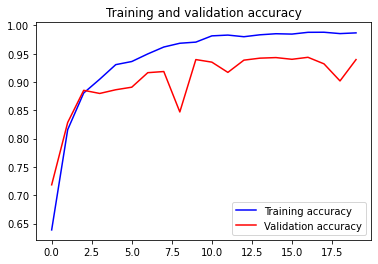

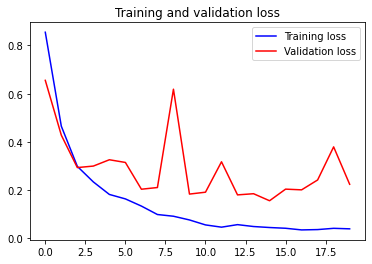

In [137]:
#Menampilkan plot history
accuracy = history_mvnet.history['accuracy']
val_acc = history_mvnet.history['val_accuracy']
loss = history_mvnet.history['loss']
val_loss = history_mvnet.history['val_loss']
 
epochs = range(len(accuracy))
 
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### **Evaluasi Model MobilenetV2**


In [97]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

Test Accuracy: 50.945 %


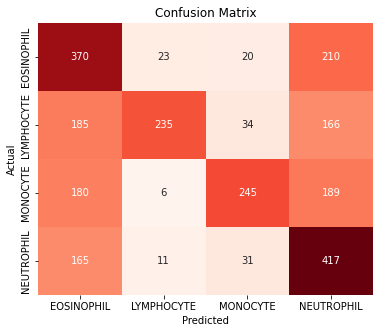

Classification Report:
-----------------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.41      0.59      0.49       623
  LYMPHOCYTE       0.85      0.38      0.53       620
    MONOCYTE       0.74      0.40      0.52       620
  NEUTROPHIL       0.42      0.67      0.52       624

    accuracy                           0.51      2487
   macro avg       0.61      0.51      0.51      2487
weighted avg       0.61      0.51      0.51      2487



In [139]:
predictions = np.argmax(model_mvnet1.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f} %".format(acc * 100))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks=np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------------\n", clr)

In [140]:
# Model Resnet
print("The best Training accuracy = {:.3f}%".format(max(accuracy)*100))
print("The best validation accuracy = {:.3f}% ".format(max(val_acc)*100))
print("The best Test accuracy =",(model_mvnet1.evaluate(test_images)[1]*100))

The best Training accuracy = 98.795%
The best validation accuracy = 94.369% 
78/78 [==============================] - 9s 96ms/step - loss: 2.8863 - accuracy: 0.5094
The best Test accuracy = 50.94491243362427


Hasil dari evaluasi model menggunakan mobilenet V2 yakni:
> The best Training accuracy = 97.904% \
> The best validation accuracy = 91.151% \
> The best Test accuracy = 50.945%

Dari hasil diatas dapat kita lihat bahwa, ada sesuatu yang mengkhawatirkan dalam hasil yang kita dapatkan. Set validasi memiliki akurasi sekitar 91% yang bagus. Namun pada set test atau pengujian, akurasinya turun menjadi sekitar 51%. Ini tidak normal dan ini menandakan adanya ketidak miripan antara data set train dengan data test.

## **KESIMPULAN**
Berdasarkan hasil image classification menggunakan data sel darah putih dengan 4 jenis kelas  menggunakan beberapa model transfer learning seperti `VGG19`, `Resnet50`, dan `MobilenetV2`. Kedaua model pertama yakni `VGG19` dan `Resnet50` memang digunakan untuk kasus klasifikasi gambar CNN untuk data yang besar dan kompleks. Sedangkan MobileNetV2 ini untuk daya representasinya terbatas dimana karena dirancang untuk ukuran yang kecil dan dioptimalkan untuk inferensi cepat, yang memungkinkannya berjalan dengan cepat bahkan pada perangkat dengan sumber daya terbatas.  Dibuktikan dengan hasil test pada model memiliki nilai yang paling kecil diantara model lainnya walau saat running model paling cepat dan memiliki akurasi train dan validation yang sangat baik(overfitting).

Sedangkan, penggunaan model Resnet memiliki akurasi test yang terbaik sejauh model yang telat diujicobakan dengan akurasi pada data test sebesar 81.1%. Sehingga untuk kedepannya model yang disarankan untuk dijadikan rekomendasi pemodelan klasifikasi darah putih ini yakni dengan model `ResNet50` dengan catatan kemungkinan akan lebih baik lagi jika mempeebaiki data cleansingnya.

Berdasarkan jurnal-jurnal kesehatan yang mengimplementasikan image classification menggunakan CNN dan transfer learning seperti diatas, pada umumnya ResNet50 untuk data data kesehatan memiliki akurasi yang sangat baik karena beberapa alasan:
1. Jumlah layer yang banyak: jika dilihat dari hasil model diatas, memang ResNet50 lah yang punya layer terbanyak yakni 174, dibanding dengan model lain.
2. ResNet50 menggunakan koneksi residual yang memungkinkan jaringan menyimpan informasi dengan lebih baik dari lapisan sebelumnya saat masuk lebih dalam ke jaringan. Ini membantu mengurangi masalah gradien yang hilang dan memungkinkan ResNet50 untuk mempelajari representasi data yang lebih kompleks.
3. Mempunyai pre-training yang memberikan fondasi yang kuat untuk jaringan, membuatnya lebih mudah beradaptasi dengan kumpulan data baru seperti citra medis.

## **REFERENSI**

* WBC-classification. https://bit.ly/2zbz8oA. Accessed: 2019-06-15.
* [Bagido, R. A., Alzahrani, M., &#38; Arif, M. (2021). White Blood Cell Types Classification Using Deep Learning Models. IJCSNS International Journal of Computer Science and Network Security, 21(9), 223–229. https://doi.org/10.22937/IJCSNS.2021.21.9.30
](https://koreascience.kr/article/JAKO202129436703262.pdf)
* [Jung, C., Abuhamad, M., Mohaisen, D., Han, K., & Nyang, D. (2022). WBC image classification and generative models based on convolutional neural network. BMC Medical Imaging, 22(1). https://doi.org/10.1186/s12880-022-00818-1](https://bmcmedimaging.biomedcentral.com/articles/10.1186/s12880-022-00818-1)
* [Quantology, N. (2022). Hersh A. Muhamad/A Deep Learning Method for Detecting Leukemia in Real Images A Deep Learning Method for Detecting Leukemia in Real Images. 20, 2358–2365. https://doi.org/10.14704/nq.2022.20.7.NQ33305](http://https://www.neuroquantology.com/data-cms/articles/20220722063641pmNQ33305.pdf)
* [Vatathanavaro, Supawit & Tungjitnob, Suchat & Pasupa, Kitsuchart. (2018). White Blood Cell Classification: A Comparison between VGG-16 and ResNet-50 Models.](https://site.ieee.org/thailand-cis/files/2018/11/JSCI6-Paper-2.pdf)
* [Yu, W., Chang, J., Yang, C., Zhang, L., Shen, H., Xia, Y., &#38; Sha, J. (2017, October). Automatic classification of leukocytes using deep neural network. 2017 IEEE 12th International Conference on ASIC (ASICON). http://dx.doi.org/10.1109/asicon.2017.8252657](https://www.researchgate.net/publication/322563590_Automatic_classification_of_leukocytes_using_deep_neural_network)
